In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import glob

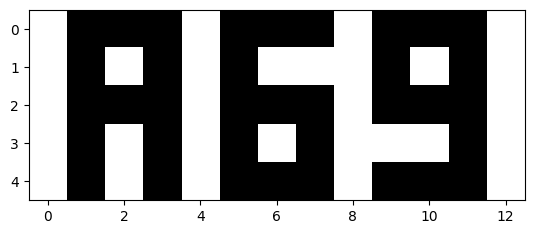

In [3]:
#Task01
Letter_A69 = np.array( [[255, 0, 0, 0, 255, 0, 0, 0, 255,  0, 0, 0, 255],
                      [255, 0, 255, 0, 255, 0, 255, 255,  255, 0, 255, 0, 255],
                      [255, 0, 0, 0, 255, 0, 0, 0, 255,  0, 0, 0, 255],
                  [255, 0, 255, 0, 255, 0, 255, 0, 255, 255, 255, 0, 255],
                      [255, 0, 255, 0, 255, 0, 0, 0, 255,  0, 0, 0, 255]])
plt.imshow(Letter_A69,cmap='gray')

TASK_02
1. Resizing: Reduce image size for faster processing and display.
Logic: Resizing is useful for making images smaller for display, or larger for better detail analysis.
2. Cropping: Select a region of interest (ROI) from the image.
Logic: Cropping is useful to eliminate unnecessary information from the image, or to isolate an object in an image.
3. Flipping: Mirror the image horizontally or vertically
Logic: Flipping is used for data augmentation (creating more training data for models) or correcting image orientation.
4. Rotation: Rotate the image by a certain angle.
Logic: Rotation can correct image orientation or be used for object detection in different orientations.
5. Translation: Shift the image horizontally and vertically.
Logic: Translation is useful for adjusting object position in an image or for data augmentation.

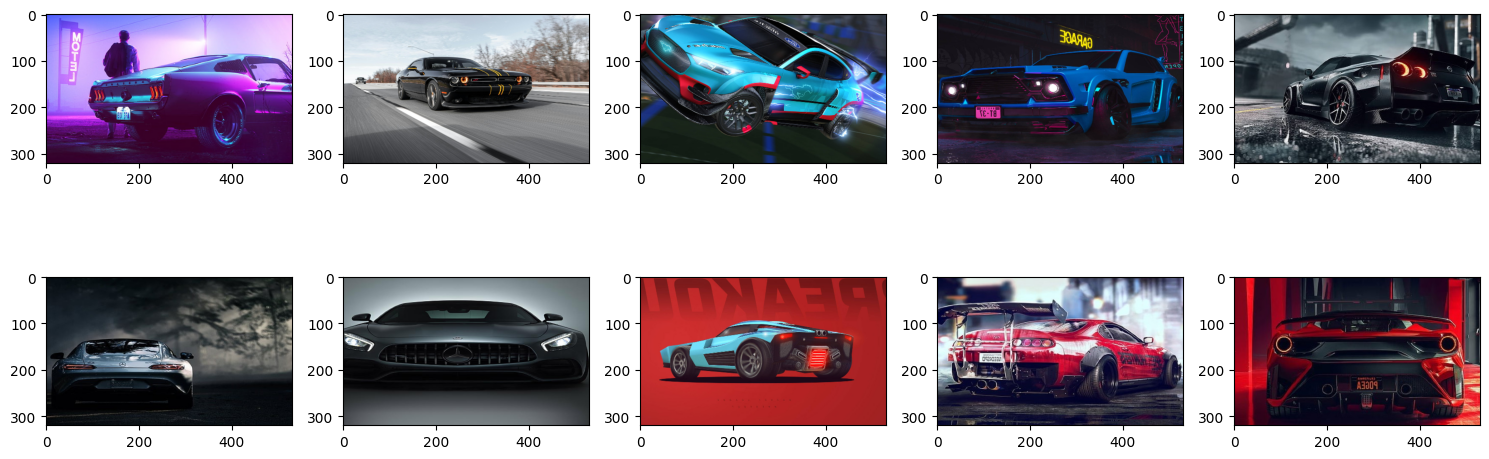

In [4]:
images=[]
for img in glob.glob(r'/content/drive/MyDrive/22301269_AHANAF_ABID_SAZID_Lab1/Task2'+'/*.*'):
  images.append(cv2.imread(img))
new_images = []
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, img in enumerate(images):
    row = i // 5
    col = i % 5
    width = 720
    height = 1280
    dim = (width, height)

    resized_image = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

    flipped_image = cv2.flip(resized_image, 0)

    rows,cols = flipped_image.shape[:2]
    M = cv2.getRotationMatrix2D((cols/2,rows/2),-90,0.5)
    dst = cv2.warpAffine(flipped_image,M,(cols,rows))

    shift_x = 5
    shift_y = 0
    translation_matrix = np.float32([[1, 0, shift_x], [0, 1, shift_y]])
    translated_image = cv2.warpAffine(dst, translation_matrix, (dst.shape[1], dst.shape[0]))

    cropped_image = translated_image[500:820, 120:650]

    new_images.append(cropped_image)
    axes[row, col].imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.tight_layout()
plt.show()

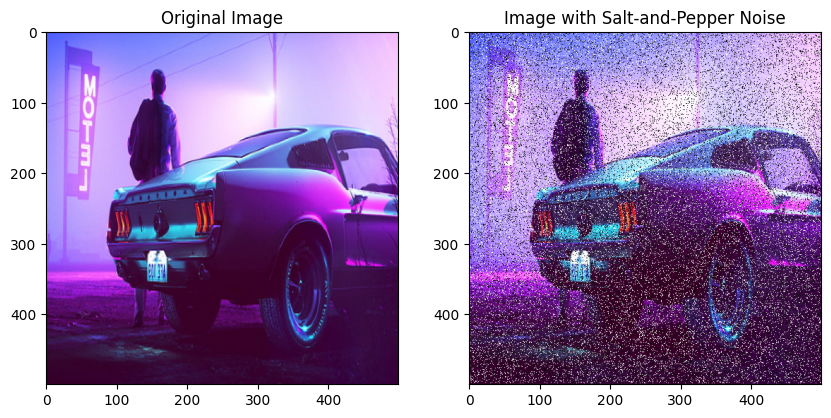

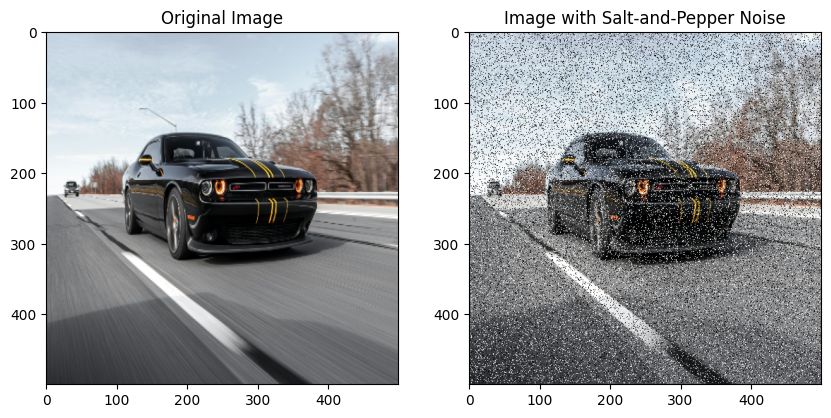

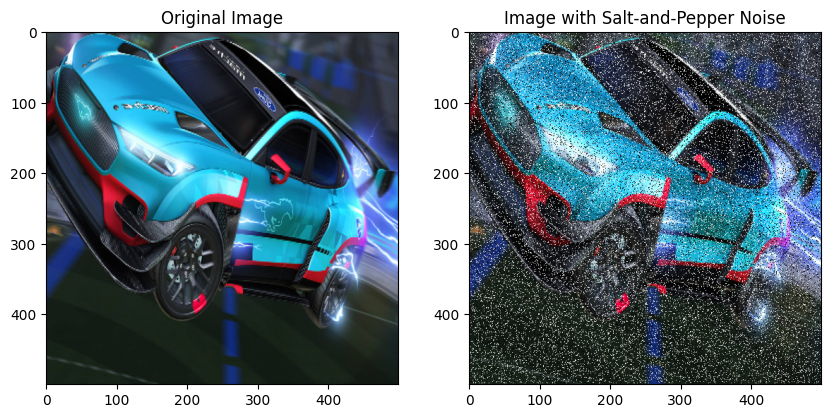

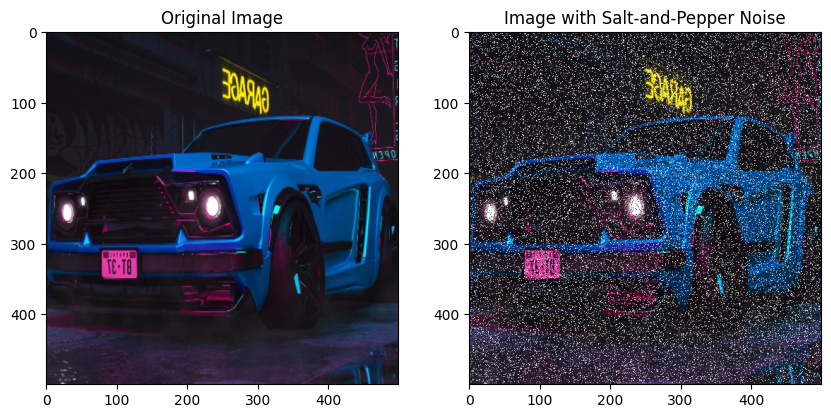

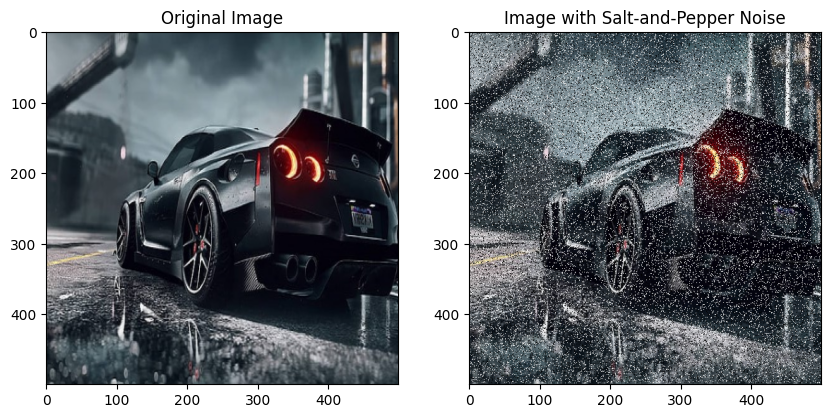

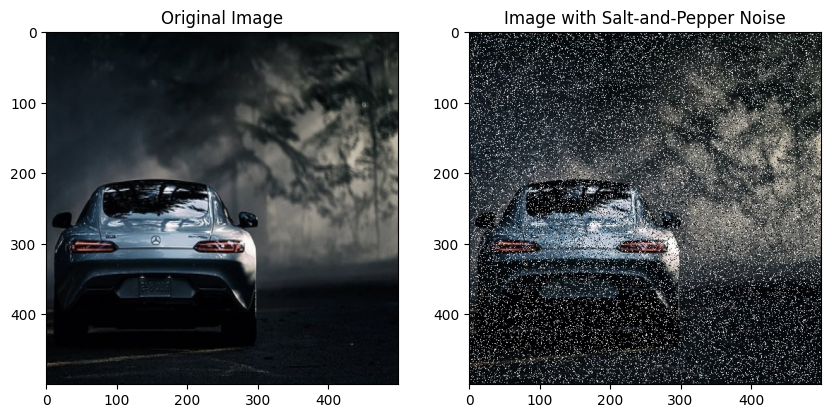

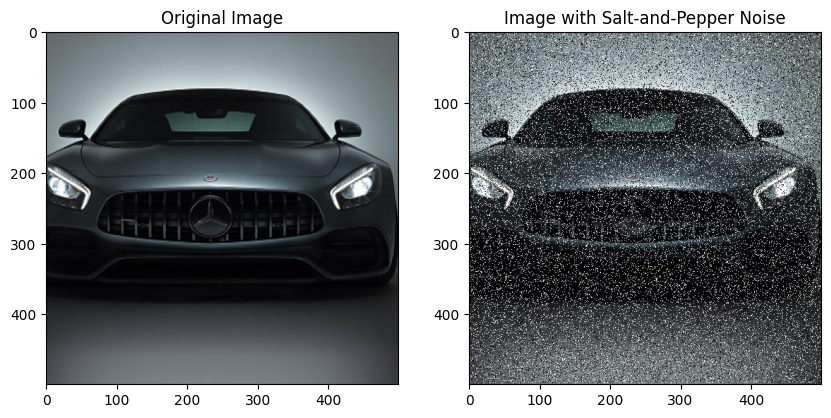

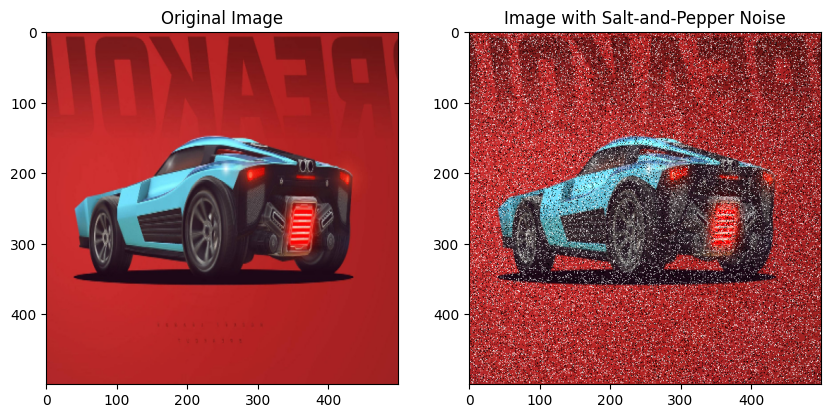

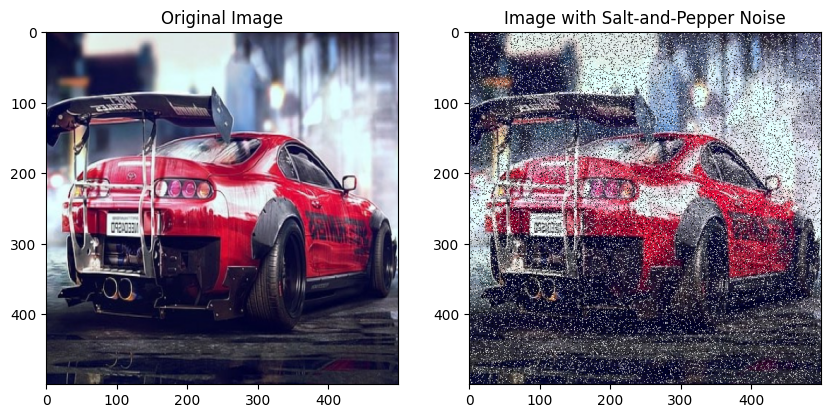

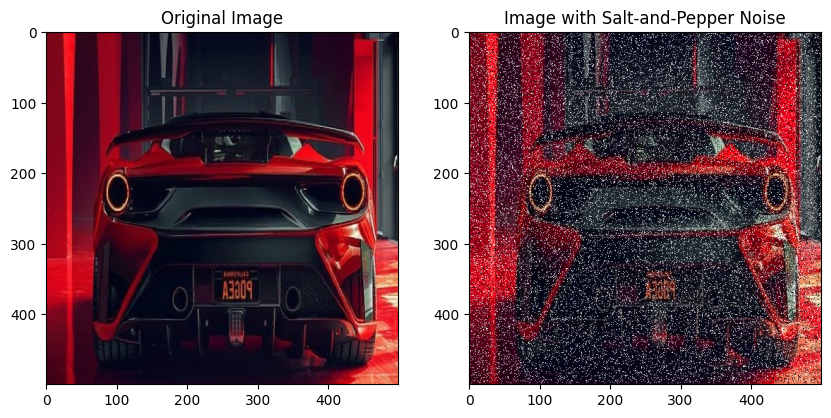

In [5]:
images = new_images
for i, img in enumerate(images):
    row = i // 5
    col = i % 5
    width = 500
    height = 500
    dim = (width, height)
    d = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    row,col,ch= d.shape

    prob = 0.05

# Generate random noise
    noisy_image = np.copy(d)
    num_salt = np.ceil(prob * d.size * 0.7).astype(int)
    num_pepper = np.ceil(prob * d.size * 0.7).astype(int)

# Apply 'salt' noise (white pixels)
    coords = [np.random.randint(0, i - 1, num_salt) for i in d.shape]
    noisy_image[coords[0], coords[1]] = 255

# Apply 'pepper' noise (black pixels)
    coords = [np.random.randint(0, i - 1, num_pepper) for i in d.shape]
    noisy_image[coords[0], coords[1]] = 0


# Display the original and noisy images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(d.astype(np.uint8), cv2.COLOR_BGR2RGB))

    plt.subplot(1, 2, 2)
    plt.title("Image with Salt-and-Pepper Noise")
    plt.imshow(cv2.cvtColor(noisy_image.astype(np.uint8), cv2.COLOR_BGR2RGB))

plt.show()


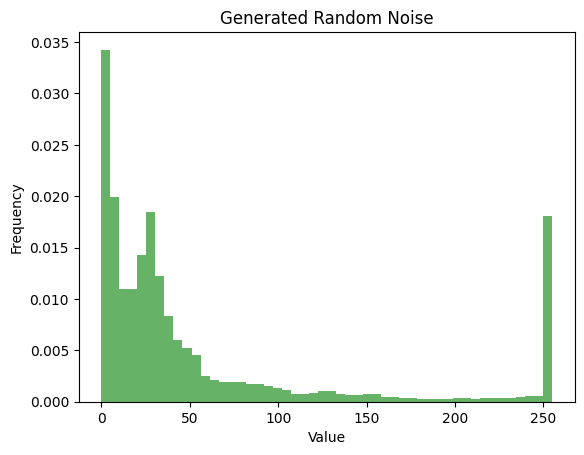

In [6]:
flattened_noise = noisy_image.flatten()
plt.hist(flattened_noise, bins=50, density=True, alpha=0.6, color='g')
plt.title('Generated Random Noise')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

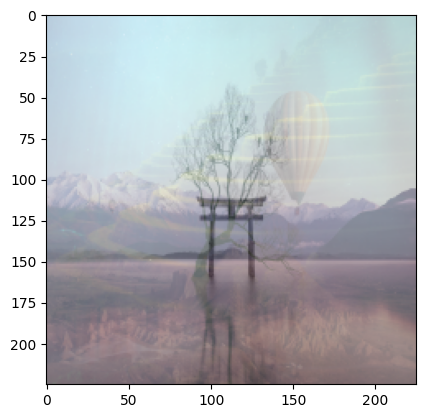

In [7]:
#Task 3
images=[]
for img in glob.glob(r'/content/drive/MyDrive/22301269_AHANAF_ABID_SAZID_Lab1/task3'+'/*.*'):
  images.append(cv2.imread(img))
width = 225
height = 225
dim = (width, height)

for i, img in enumerate(images):
    resized_image = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    if i==0:
        result = cv2.resize(images[0], dim, interpolation = cv2.INTER_AREA)*0.15
    else:
        val=0.1*i
        result = result + (resized_image*val)
result = result.astype('uint8')
plt.imshow(cv2.cvtColor(result.astype(np.uint8), cv2.COLOR_BGR2RGB))

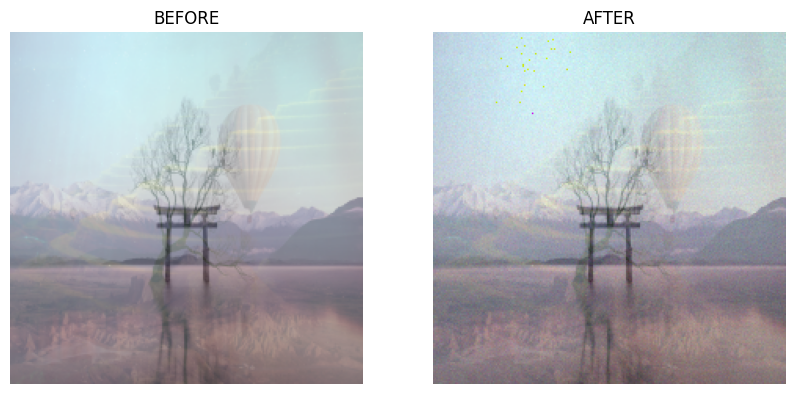

In [8]:
img = result
# Generate Gaussian noise with the same size as the image
noise = np.random.randn(*img.shape) * 5
# Add the noise to the image
output = img + noise
# Display the original and noisy images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('BEFORE')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('AFTER')
plt.imshow(cv2.cvtColor(output.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

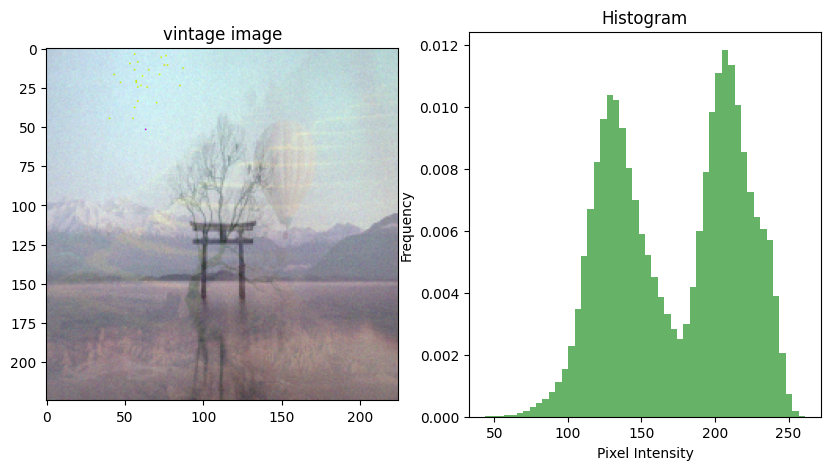

In [9]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("vintage image")
plt.imshow(cv2.cvtColor(output.astype(np.uint8), cv2.COLOR_BGR2RGB))
# Plot the histogram
plt.subplot(1, 2, 2)

plt.hist(output.flatten(), bins=50, density=True, alpha=0.6, color='g')
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()